<div>
<h1>Run the cell below to generate the road map (do not modify it)</h1></div>

In [1]:
%%javascript
var kernel = IPython.notebook.kernel;var thename = window.document.getElementById("notebook_name").innerHTML;var command = "THE_NOTEBOOK = " + "'"+thename+"'";kernel.execute(command);command="os.environ['THE_NOTEBOOK'] = THE_NOTEBOOK";kernel.execute(command);var cell = IPython.notebook.get_cell(2);cell.execute();IPython.notebook.get_cell(3).focus_cell();var x = $('.code_cell');$(x[1]).children('.input').hide();

<IPython.core.display.Javascript object>

In [2]:
outputdir = "/tmp/tools/"
!mkdir -p $outputdir
!wget "https://www.dropbox.com/s/4g0pigmro4vo1b4/menutemplate?dl=0" -O /tmp/tools/menutemplate >> /tmp/toollog 2>&1 
!wget "https://www.dropbox.com/s/3flttpzhsja8td7/construct_menu.py?dl=0" -O /tmp/tools/construct_menu.py >> /tmp/toollog 2>&1 
!python /tmp/tools/construct_menu.py "{THE_NOTEBOOK}.ipynb" {outputdir}
from IPython.core.display import HTML
output_file_name = outputdir + THE_NOTEBOOK.replace(" ", "").replace("[", "").replace("]", "") + ".ipynb.html"
with open(output_file_name) as fp:
    html = fp.read()
HTML(html)

# Goals of the Laboratory
In this introductory laboratory, we expect students to:

1. Acquire basic knowledge about Python and Matplotlib
2. Gain familiarity with Juypter Notebooks
3. Gain familiarity with the PySpark API and SparkSQL

To achieve such goals, we will go through the following steps:

1. In section 1, **IPython** and **Jupyter Notebooks** are introduced to help students understand the environment used to work on Data Science projects.

2. In section 2, we briefly overview **Python** and its syntax. In addition, we cover **Matplotlib**, a very powerful library to plot figures in Python, which you can use for your Data Science projects. Finally, we introduce **Pandas**, a python library that is very helpful when working on Data Science projects.

3. In section 3 we cover the **PySpark** and **SparkSQL** APIs

4. In section 4, we conclude the introductory laboratory with a simple use case.


# 1. Python, IPython and Jupyter Notebooks

**Python** is a high-level, dynamic, object-oriented programming language. It is a general purpose language, which means that many things are made easy. It's designed to be easy to program and easy to read.

**IPython** (Interactive Python) is orignally developed for Python. Now, it is a command shell for interactive computing in multiple programming languages. It offers rich media, shell syntax, tab completion, and history. IPython is based on an architecture that provides parallel and distributed computing. IPython enables parallel applications to be developed, executed, debugged and monitored interactively.

**Jupyter Notebooks** are a web-based interactive computational environment for creating IPython notebooks. An IPython notebook is a JSON document containing an ordered list of input/output cells which can contain code, text, mathematics, plots and rich media.  That makes data analysis easier to perform, understand and reproduce. All laboratories in this course are prepared as Notebooks. As you can see, in this Notebook, we can put text, images, hyperlinks, source code... The Notebooks can be converted to a number of open standard output formats (HTML, HTML presentation slides, LaTeX, PDF, ReStructuredText, Markdown, Python) through `File` -> `Download As` in the web interface. Beside, Jupyter manages the notebooks' versions through a `checkpoint` mechanism. You can create checkpoint anytime via `File -> Save and Checkpoint`.

Let's go throught the features of Jupyter Notebooks.

## 1.1. Tab completion

Tab completion is a convenient way to explore the structure of any object you're dealing with. Simply type object_name.<TAB> to view the suggestion for object's attributes. Besides Python objects and keywords, tab completion also works on file and directory names.

In [27]:
s = "test function of tab completion"
a = s.capitalize
print(a)
#a = s.split
# type s.<TAB> to see the suggestions
# For example, you can show your tests to work on a string. Try splitting a string into its constituent words!

<built-in method capitalize of str object at 0x7f171685c7b0>


## 1.2. System shell commands

To run any command in the system shell, simply prefix it with `!`. For example:

In [12]:
# list all file and directories in the current folder
!ls

[Lecture 2] Introduction to PySpark.ipynb


## 1.3. Magic functions

IPython has a set of predefined `magic functions` that you can call with a command line style syntax. There are two types of magics, line-oriented and cell-oriented. 

**Line magics** are prefixed with the `%` character and work much like OS command-line calls: they get as an argument the rest of the line, *where arguments are passed without parentheses or quotes*. 

**Cell magics** are prefixed with a double `%%`, and they are functions that get as an argument not only the rest of the line, but also the lines below it in a separate argument.

In [13]:
%timeit range(1000)

The slowest run took 11.70 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 281 ns per loop


In [14]:
%%timeit x = range(10000)
max(x)

1000 loops, best of 3: 344 µs per loop


For more information, you can follow this [link](http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb)

## 1.4. Debugging

Whenever an exception occurs, the call stack is print out to help you to track down the true source of the problem. It is important to gain familiarity with the call stack, especially when using the PySpark API.

In [21]:
for i in [4,3,2,0]:
    print(5/i)

1.25
1.6666666666666667
2.5


ZeroDivisionError: division by zero

## 1.5. Additional features

Jupyter also supports viewing the status of the cluster and interact with the real shell environment.

To do that, you can click on the Logo Jupyter in the up-left coner of each notebook to go to the dashboard:

<img src="https://farm2.staticflickr.com/1488/24681339931_733acb3494_b.jpg" width="600px" />

You can easily find out how to use these features, so you're invited to play around!!

# 2. Python + Pandas + Matplotlib: A great environment for Data Science

This section aims to help the students have a basic understanding of the python programming language and its wonderful libraries. It also helps whose who are not familiar with `Pandas` or `Matplotlib` to have a first glance at basic use of such libraries. 

When working with a small dataset (one that can comfortably fit into a single machine), Pandas and Matplotlib, together with Python are valid alternatives to other popular tools such as R and Matlab. Using such libraries allows to inherit from the simple and clear Python syntax, achieve very good performance, enjoy a better memory management, better error handling, and good package management \[[1](http://ajminich.com/2013/06/22/9-reasons-to-switch-from-matlab-to-python/)\].


## 2.1. Python syntax

(This section is for students who did not program in Python before. If you're familiar with Python, please move to the next section: 1.2. Numpy)

When working with Python, the code seems to be simpler than (many) other languages. In this laboratory, we compare the Python syntax to that of Java - another very common language.

```java
// java syntax
int i = 10;
string s = "advanced machine learning";
System.out.println(i);
System.out.println(s);
// you must not forget the semicolon at the end of each sentence
```

In [ ]:
# python syntax
i = 10
s = "advanced machine learning"
print(i)
print(s)
# forget about the obligation of commas

### Indentation & If-else syntax
In python, we don't use `{` and `}` to make blocks of codes. Instead, we use indentation to do that. **The codes in the same block must have the same indentation**. For example, in java, we write:
```java
string language = "Python";

// the block is surrounded by { and }
// the condition is in ( and )
if (language == "Python") {
    int x = 1;
    x += 10;
       int y = 5; // a wrong indentation isn't problem
    y = x + y;
    System.out.println(x + y);
    
    // a statement is broken into two line
    x = y
        + y;
    
    // do some stuffs
}
else if (language == "Java") {
    // another block
}
else {
    // another block
}
```

In [35]:
language = "Python"
if language == "Python":
    x = 10
    x += 10
    y = 5 # all statements in the same block must has the same indentation
    y = (x + y) # a statement can be in multiple line with ( )
    print (x 
           + y)
    
    # statement can also be divided by using \ at the END of each line
    x = y \
        + y
    
    
elif language == "Java":
    pass
else:
    # another block
    pass

45


### Ternary conditional operator
In python, we often see ternary conditional operator when reading code of labraries. It is an operator to assign a value for a variable based on some condition. For example, in java, we write:

```java
int x = 10;
// if x > 10, assign y = 5, otherwise, y = 15
int y = (x > 10) ? 5 : 15;

int z;
if (x > 10)
    z = 5; // it's not necessary to have { } when the block has only one statement
else
    z = 15;
```

Of course, although we can easily write these lines of code in an `if else` block to get the same result, people prefer ternary conditioinal operator because of its simplicity.

In python, we write:

In [39]:
x = 10
# a very natural way
y = 5 if x > 10 else 15
print(y)

# another way
y = x > 10 and 5 or 15
print(y)

15
False


### List & For loop
Another syntax that we should revisit is the `for loop`. In java, we can write:

```java
// init an array with 10 integer numbers
int[] array = new int[]{1, 2, 3, 4, 5, 6, 7, 8, 9, 10};
for (int i = 0; i < array.length; i++){
    // print the i-th element of array
    System.out.println(array[i]);
}
```

In Python, instead of using an index to help indicating an element, we can access the element directly:

In [46]:
array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# Python has no built-in array data structure
# instead, it uses "list" which is much more general 
# and can be used as a multidimensional array quite easily.
for a in array:
    print(a)

1
2
3
4
5
6
7
8
9
10


As we can see, the code is very clean. If you need the index of each element, it's no problem:

In [45]:
element = 4
for (index,element) in enumerate(array):
    print(index, element)

(0, 1) 4
(1, 2) 4
(2, 3) 4
(3, 4) 4
(4, 5) 4
(5, 6) 4
(6, 7) 4
(7, 8) 4
(8, 9) 4
(9, 10) 4


Actually, Python has no built-in array data structure. It uses `list` which is much more general and can be used as a multidimensional array quite easily. Besides, the elements in a list are retrieved in a very concise way. For example, we create a 2d-array with 4 rows. Each row has 3 elements.

In [55]:
# 2-dimentions array with 4 rows, 3 columns
twod_array = [[1, 2, 3], [4, 5, 6], [7, 8, 9], "qwer"]
for index, row in enumerate(twod_array):
    print("row ", index, ":", row)

# print row 1 until row 3
print("row 1 until row 3: ", twod_array[1:3])

# all rows from row 2
print("all rows from row 2: ", twod_array[2:])

# all rows until row 2
print("all rows until row 2:", twod_array[3][1])

# all rows from the beginning with step of 2. 
print("all rows from the beginning with step of 2:", twod_array[::2])

row  0 : [1, 2, 3]
row  1 : [4, 5, 6]
row  2 : [7, 8, 9]
row  3 : qwer
row 1 until row 3:  [[4, 5, 6], [7, 8, 9]]
all rows from row 2:  [[7, 8, 9], 'qwer']
all rows until row 2: w
all rows from the beginning with step of 2: [[1, 2, 3], [7, 8, 9]]


### Dictionary
Another useful data structure in Python is `dictionary`. A dictionary stores (key, value) pairs. You can use it like this:

In [61]:
d = {1: 'value1', 'key2': 'value2'}  # Create a new dictionary with some data
print(d[1])       # Get an entry from a dictionary; prints "value1"
print('key1' in d)     # Check if a dictionary has a given key; prints "True"
d['key3'] = 'value3'    # Set an entry in a dictionary
print(d['key3'])      # Prints "wet"
# print(d['key9'])  # KeyError: 'monkey' not a key of d
print(d.get('key9', 'custom_default_value'))  # Get an element with a default; prints "custom_default_value"
print(d.get('key3', 'custom_default_value'))    # Get an element with a default; prints "value3"
del d['key3']        # Remove an element from a dictionary
print(d.get('key3', 'custom_default_value')) # "fish" is no longer a key; prints "custom_default_value"


value1
False
value3
custom_default_value
value3
custom_default_value


### Functions
In Python, we can define a function by using keyword `def`.

In [63]:
def square(x):
    return x*x

print(square(5))

25


You can apply a function on each element of a list/array by using `lambda` function. For example, we want to square elements in a list:

In [69]:
array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# apply function "square" on each element of "array"
print(list(map(lambda x: square(x), array))) # not clear.

# or using a for loop
print([square(x) for x in array])

print("orignal array:", array)

[<function <lambda> at 0x7f171687e598>, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
orignal array: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


These two above syntaxes are used very often. We can also put a function `B` inside a function `A` (that is, we can have nested functions). In that case, function `B` is only accessed inside function `A` (the scope that it's declared). For example:

In [70]:
# select only the prime number in array
# and square them
def filterAndSquarePrime(arr):
    
    # a very simple function to check a number is prime or not
    def checkPrime(number):
        for i in range(2, int(number/2)):
            if number % i == 0:
                return False
        return True
    
    primeNumbers = filter(lambda x: checkPrime(x), arr)
    return map(lambda x: square(x), primeNumbers)

# we can not access checkPrime from here
# checkPrime(5)

result = filterAndSquarePrime(array)
list(result)

[1, 4, 9, 16, 25, 49]

### Importing modules, functions
Modules in Python are packages of code. Putting code into modules helps increasing the reusability and maintainability.
The modules can be nested.
To import a module, we simple use syntax: `import <module_name>`. Once it is imported, we can use any functions, classes inside it.

In [ ]:
# import module 'math' to uses functions for calculating
import math

# print the square root of 16
print(math.sqrt(16))

# we can create alias when import a module
import numpy as np

print(np.sqrt(16))

Sometimes, you only need to import some functions inside a module to avoid loading the whole module into memory. To do that, we can use syntax: `from <module> import <function>`

In [ ]:
# only import function 'sin' in package 'math'
from math import sin

# use the function
print(sin(60))

That's quite enough for Python. Now, let's practice a little bit.

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)
<div style='border-radius: 15px; background: rgb(224,239,130);padding:10px;'/>

### Question 1
#### Question 1.1
Write a function `checkSquareNumber` to check if a integer number is a square number or not. For example, 16 and 9 are square numbers. 15 isn't square number.
Requirements:

- Input: an integer number

- Output: `True` or `False`

HINT: If the square root of a number is integer, then it is a square number.


In [72]:
import math

def checkSquareNumber(x):
    # get the integer part of its square root
    
    # check if square root is integer
    return (math.sqrt(x)).is_integer()

print(checkSquareNumber(16))
print(checkSquareNumber(250))

True
False


<div style='border-radius: 15px; background: rgb(224,239,130);padding:10px;'/>
#### Question 1.2
A list `list_numbers` which contains the numbers from 1 to 9999 can be constructed from: 

```python
list_numbers = range(0, 10000)
```

Extract the square numbers in `list_numbers` using function `checkSquareNumber` from question 1.1. How many elements in the extracted list ?

In [75]:

list_numbers = range(0,10000) 

square_numbers = list(filter(lambda x:checkSquareNumber(x),list_numbers))# try to use the filter method
print(square_numbers)
print(len(square_numbers))


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916, 3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225, 4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569, 7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604, 9801]
100


<div style='border-radius: 15px; background: rgb(224,239,130);padding:10px;'/>
#### Question 1.3

Using array slicing, select the elements of the list square_numbers, whose index is from 5 to 20 (zero-based index).

In [76]:

print(square_numbers[5:20])


[25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361]


Next, we will take a quick look on Numpy - a powerful module of Python.

## 2.2. Numpy
Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.
### 2.2.1. Array
A numpy array is a grid of values, all of **the same type**, and is indexed by a tuple of nonnegative integers. Thanks to the same type property, Numpy has the benefits of [locality of reference](https://en.wikipedia.org/wiki/Locality_of_reference). Besides, many other Numpy operations are implemented in C, avoiding the general cost of loops in Python, pointer indirection and per-element dynamic type checking. So, the speed of Numpy is often faster than using built-in datastructure of Python. When working with massive data with computationally expensive tasks, you should consider to use Numpy. 

The number of dimensions is the `rank` of the array; the `shape` of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [4]:
import numpy as np

# Create a rank 1 array
rank1_array = np.array([1, 2, 3])
print("type of rank1_array:", type(rank1_array))
print("shape of rank1_array:", rank1_array.shape)
print("elements in rank1_array:", rank1_array[0], rank1_array[1], rank1_array[2])

# Create a rank 2 array
rank2_array = np.array([[1,2,3],[4,5,6]])
print("shape of rank2_array:", rank2_array.shape)
print(rank2_array[0, 0], rank2_array[0, 1], rank2_array[1, 0])

type of rank1_array: <class 'numpy.ndarray'>
shape of rank1_array: (3,)
elements in rank1_array: 1 2 3
shape of rank2_array: (2, 3)
1 2 4


# 2.2.2. Array slicing
Similar to Python lists, numpy arrays can be sliced. The different thing is that you must specify a slice for each dimension of the array because arrays may be multidimensional.

In [92]:
m_array = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
#print(m_array)
# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2
b = m_array[0:2,1:3]
print(b)

# we can only this syntax with numpy array, not python list
print("value at row 0, column 1:", m_array[0, 1])

# Rank 1 view of the second row of m_array  
print("the second row of m_array:", m_array[1, :])

# print element at position (0,2) and (1,3)
print(m_array[[0,1], [2,3]])

[[2 3]
 [6 7]]
value at row 0, column 1: 2
the second row of m_array: [5 6 7 8]
[3 8]


### 2.2.3. Boolean array indexing
We can use boolean array indexing to check whether each element in the array satisfies a condition or use it to do filtering.

In [93]:
m_array = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Find the elements of a that are bigger than 2
# this returns a numpy array of Booleans of the same
# shape as a, where each value of bool_idx tells
# whether that element of a is > 3 or not
bool_idx = (m_array > 3)
print(bool_idx , "\n")

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(m_array[bool_idx], "\n")

# We can combine two statements
print(m_array[m_array > 3], "\n")

# select elements with multiple conditions
print(m_array[(m_array > 3) & (m_array % 2 == 0)])


[[False False False  True]
 [ True  True  True  True]
 [ True  True  True  True]] 

[ 4  5  6  7  8  9 10 11 12] 

[ 4  5  6  7  8  9 10 11 12] 

[ 4  6  8 10 12]


### 2.2.4. Datatypes
Remember that the elements in a numpy array have the same type. When constructing arrays, Numpy tries to guess a datatype when you create an array However, we can specify the datatype explicitly via an optional argument.

In [ ]:
# let Numpy guess the datatype
x1 = np.array([1, 2])
print(x1.dtype)

# force the datatype be float64
x2 = np.array([1, 2], dtype=np.float64)
print(x2.dtype)

### 2.2.5. Array math
Similar to Matlab or R, in Numpy, basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module.

In [94]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
# mathematical function is used as operator
print("x + y =", x + y, "\n")

# mathematical function is used as function
print("np.add(x, y)=", np.add(x, y), "\n")

# Unlike MATLAB, * is elementwise multiplication
# not matrix multiplication
print("x * y =", x * y , "\n")
print("np.multiply(x, y)=", np.multiply(x, y), "\n")
print("x*2=", x*2, "\n")

# to multiply two matrices, we use dot function
print("x.dot(y)=", x.dot(y), "\n")
print("np.dot(x, y)=", np.dot(x, y), "\n")

# Elementwise square root
print("np.sqrt(x)=", np.sqrt(x), "\n")

x + y = [[  6.   8.]
 [ 10.  12.]] 

np.add(x, y)= [[  6.   8.]
 [ 10.  12.]] 

x * y = [[  5.  12.]
 [ 21.  32.]] 

np.multiply(x, y)= [[  5.  12.]
 [ 21.  32.]] 

x*2= [[ 2.  4.]
 [ 6.  8.]] 

x.dot(y)= [[ 19.  22.]
 [ 43.  50.]] 

np.dot(x, y)= [[ 19.  22.]
 [ 43.  50.]] 

np.sqrt(x)= [[ 1.          1.41421356]
 [ 1.73205081  2.        ]] 



Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the `dot` function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices.

In [ ]:
# declare two vectors
v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors
print("v.dot(w)=", v.dot(w))
print("np.dot(v, w)=", np.dot(v, w))

# Matrix / vector product
print("x.dot(v)=", x.dot(v))
print("np.dot(x, v)=", np.dot(x, v))

# Matrix / matrix product
print("x.dot(y)=", x.dot(y))
print("np.dot(x, y)=", np.dot(x, y))

Besides, we can do other aggregation computations on arrays such as `sum`, `nansum`, or `T`.

In [111]:
x = np.array([[1,2], [3,4]])

# Compute sum of all elements
print(np.sum(x))

# Compute sum of each column
print(np.sum(x, axis=0))

# Compute sum of each row
print(np.sum(x, axis=1))

# transpose the matrix
print(x.T)

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v.T)  # Prints "[1 2 3]"

10
[4 6]
[3 7]
[[1 3]
 [2 4]]
[1 2 3]


![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)
<div style='border-radius: 15px; background: rgb(224,239,130);padding:10px;'/>

### Question 2

Given a 2D array:

```
 1  2  3  4
 5  6  7  8 
 9 10 11 12
13 14 15 16
```

#### Question 2.1

Print the all odd numbers in this array using `Boolean array indexing`.


In [99]:
array_numbers = np.array([
        [1, 2, 3, 4],
        [5, 6, 7, 8],
        [9, 10, 11, 12],
        [13, 14, 15, 16]
    ])

print(array_numbers[array_numbers%2 ==1])

#print(array_numbers.dot(array_numbers%2 ==1)) for printing odd numbers at their postions and zeros at even positions


[ 1  3  5  7  9 11 13 15]
[[10  0 10  0]
 [26  0 26  0]
 [42  0 42  0]
 [58  0 58  0]]


<div style='border-radius: 15px; background: rgb(224,239,130);padding:10px;'/>
#### Question 2.2

Extract the second row and the third column in this array using `array slicing`.

In [102]:

print(array_numbers[1:2,:])
print(array_numbers[:,2:3])


[[5 6 7 8]]
[[ 3]
 [ 7]
 [11]
 [15]]


<div style='border-radius: 15px; background: rgb(224,239,130);padding:10px;'/>
#### Question 2.3
Calculate the sum of diagonal elements.

In [106]:

sum = 0
for i in range(0, array_numbers.shape[1]):
    sum += array_numbers[i][i]
    
print(sum)


34


<div style='border-radius: 15px; background: rgb(224,239,130);padding:10px;'/>
#### Question 2.4
Print elementwise multiplication of the first row and the last row using numpy's functions.

Print the inner product of these two rows.


In [112]:

print(array_numbers[:1,:]*array_numbers[3:4,:])
print(array_numbers[:1,:].dot(array_numbers[3:4,:].T))


[[13 28 45 64]]
[[150]]


## 2.3. Matplotlib

As its name indicates, Matplotlib is a plotting library. It provides both a very quick way to visualize data from Python and publication-quality figures in many formats. The most important function in matplotlib is `plot`, which allows you to plot 2D data.

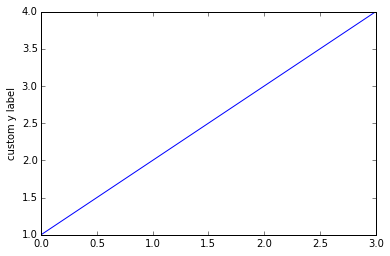

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('custom y label')
plt.show()

In this case, we provide a single list or array to the `plot()` command, matplotlib assumes it is a sequence of y values, and automatically generates the x values for us. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are [0,1,2,3].

In the next example, we plot figure with both x and y data. Besides, we want to draw dashed lines instead of the solid in default.

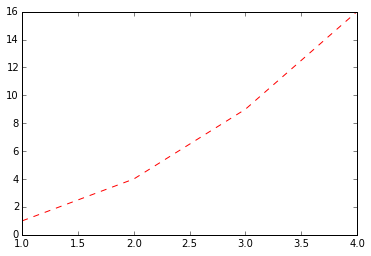

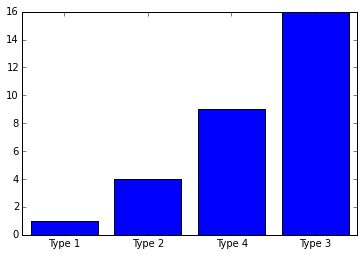

In [116]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'r--')
plt.show()

plt.bar([1, 2, 3, 4], [1, 4, 9, 16], align='center')
# labels of each column bar
x_labels = ["Type 1", "Type 2", "Type 3", "Type 4"]
# assign labels to the plot
plt.xticks([1, 2, 4, 3], x_labels)

plt.show()

If we want to merge two figures into a single one, subplot is the best way to do that. For example, we want to put two figures in a stack vertically, we should define a grid of plots with 2 rows and 1 column. Then, in each row, a single figure is plotted.

In [ ]:
# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'r--')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.bar([1, 2, 3, 4], [1, 4, 9, 16])

plt.show()

For more examples, please visit the [homepage](http://matplotlib.org/1.5.1/examples/index.html) of Matplotlib.


![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

<div style='border-radius: 15px; background: rgb(224,239,130);padding:10px;'/>

###  Question 3
Given a list of numbers from 0 to 9999.

#### Question 3.1
Calculate the histogram of numbers divisible by 3, 7, 11 in the list respectively.

( Or in other word, how many numbers divisible by 3, 7, 11 in the list respectively ?)

In [7]:

arr = np.array(range(0,9999))

divisors = [3, 7, 11]
histogram = list(map(lambda))
print(histogram)


[3, 7, 11]


<div style='border-radius: 15px; background: rgb(224,239,130);padding:10px;'/>
#### Question 3.2
Plot the histogram in a line chart.

```python
%matplotlib inline
import matplotlib.pyplot as plt

# simple line chart
plt.plot(histogram)
x_indexes = ...
x_names = list(...)
plt.xticks(x_indexes, x_names)
plt.show()
```

<div style='border-radius: 15px; background: rgb(224,239,130);padding:10px;'/>
#### Question 3.3
Plot the histogram in a bar chart.

```python
# char chart with x-lables
x_indexes = range(...)
x_names = list(...)
plt.bar( x_indexes, histogram, align='center')
plt.xticks(x_indexes, x_names)
plt.show()
```

## 2.4. Pandas

Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. Indeeed, it is great for data manipulation, data analysis, and data visualization.

### 2.4.1. Data structures
Pandas introduces has two useful (and powerful) structures: `Series` and `DataFrame`, both of which are built on top of NumPy.

#### Series
A `Series` is a one-dimensional object similar to an array, list, or even column in a table. It assigns a *labeled index* to each item in the Series. By default, each item will receive an index label from `0` to `N-1`, where `N` is the number items of `Series`.

We can create a Series by passing a list of values, and let pandas create a default integer index.


In [8]:
import pandas as pd
import numpy as np

# create a Series with an arbitrary list
s = pd.Series([3, 'Machine learning', 1.414259, -65545, 'Happy coding!'])
print(s)

0                   3
1    Machine learning
2             1.41426
3              -65545
4       Happy coding!
dtype: object


Or, an index can be used explixitly when creating the `Series`.

In [9]:
s = pd.Series([3, 'Machine learning', 1.414259, -65545, 'Happy coding!'],
             index=['Col1', 'Col2', 'Col3', 4.1, 5])
print(s)

Col1                   3
Col2    Machine learning
Col3             1.41426
4.1               -65545
5          Happy coding!
dtype: object


A `Series` can be constructed from a dictionary too.

In [14]:
s = pd.Series({
        'Col7': 3, 'Col2': 'Machine learning', 
        'Col3': 1.414259, 4.14512: -65545, 
        5: 'Happy coding!'
    })
print(s)

Col2       Machine learning
4.14512              -65545
Col3                1.41426
Col7                      3
5             Happy coding!
dtype: object


We can access items in a `Series` in a same way as `Numpy`.

In [23]:
s = pd.Series({
        'Col1': 3, 'Col2': -10, 
        'Col3': 1.414259, 
        4.1: -65545, 
        5: 8
    })

# get element which has index='Col1'
print("s['Col1']=", s['Col1'], "\n")

# get elements whose index is in a given list
print("s[['Col1', 'Col3', 4.5]]=", s[['Col1', 'Col3', 4.5]], "\n")

# use boolean indexing for selection
print(s[s > 0], "\n")

# modify elements on the fly using boolean indexing
s[s > 0] = 15

print(s, "\n")

# mathematical operations can be done using operators and functions.
print(s*10,  "\n")
print(np.square(s), "\n")

s['Col1']= 3.0 

s[['Col1', 'Col3', 4.5]]= Col1    3.000000
Col3    1.414259
4.5          NaN
dtype: float64 

5       8.000000
Col3    1.414259
Col1    3.000000
dtype: float64 

Col2      -100
4.1    -655450
5          150
Col3       150
Col1       150
dtype: float64 

Col2           100
4.1     4296147025
5              225
Col3           225
Col1           225
dtype: float64 



#### DataFrame
A DataFrame is a tablular data structure comprised of rows and columns, akin to database table, or R's data.frame object. In a loose way, we can also think of a DataFrame as a group of Series objects that share an index (the column names).

We can create a DataFrame by passing a dict of objects that can be converted to series-like.

In [27]:
data = {'year': [2013, 2014, 2015, 2013, 2014, 2015, 2013, 2014],
        'tgjeam': ['Manchester United', 'Chelsea', 'Asernal', 'Liverpool', 'West Ham', 'Newcastle', 'Machester City', 'Tottenham'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
football

,year,wins,losses
0,2013,11,5
1,2014,8,8
2,2015,10,6
3,2013,15,1
4,2014,11,5
5,2015,6,10
6,2013,10,6
7,2014,4,12


We can store data as a CSV file, or read data from a CSV file.

In [28]:
# save data to a csv file without the index
football.to_csv('football.csv', index=False)

from_csv = pd.read_csv('football.csv')
from_csv.head()

,year,wins,losses
0,2013,11,5
1,2014,8,8
2,2015,10,6
3,2013,15,1
4,2014,11,5


To read a CSV file with a custom delimiter between values and custom columns' names, we can use parameters `sep` and `names` relatively.
Moreover, Pandas also supports to read and write to [Excel file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel) , sqlite database file, URL,  or even clipboard.

We can have an overview on the data by using functions `info` and `describe`.

In [ ]:
print(football.info(), "\n")
football.describe()

Numpy's regular slicing syntax works as well.

In [ ]:
print(football[0:2], "\n")

# query only the teams that win more than 10 matches from 2014
print(football[(football.year >= 2014) & (football.wins >= 10)])

An important feature that Pandas supports is `JOIN`. Very often, the data comes from multiple sources, in multiple files. For example, we have 2 CSV files, one contains the information of Artists, the other contains information of Songs. If we want to query the artist name and his/her corresponding songs, we have to do joining two dataframe.

Similar to SQL, in Pandas, you can do inner join, left outer join, right outer join and full outer join. Let's see a small example. Assume that we have two dataset of singers and songs. The relationship between two datasets is maintained by a constrain on `singer_code`.

In [ ]:
singers = pd.DataFrame({'singer_code': range(5), 
                           'singer_name': ['singer_a', 'singer_b', 'singer_c', 'singer_d', 'singer_e']})
songs = pd.DataFrame({'singer_code': [2, 2, 3, 4, 5], 
                           'song_name': ['song_f', 'song_g', 'song_h', 'song_i', 'song_j']})
print(singers)
print('\n')
print(songs)

In [ ]:
# inner join
pd.merge(singers, songs, on='singer_code', how='inner')

In [ ]:
# left join
pd.merge(singers, songs, on='singer_code', how='left')

In [ ]:
# right join
pd.merge(singers, songs, on='singer_code', how='right')

In [ ]:
# outer join (full join)
pd.merge(singers, songs, on='singer_code', how='outer')

We can also concat two dataframes vertically or horizontally via function `concat` and parameter `axis`. This function is useful when we need to append two similar datasets or to put them side by site

In [ ]:
# concat vertically
pd.concat([singers, songs])

In [ ]:
# concat horizontally
pd.concat([singers, songs], axis=1)

When doing statistic, we usually need to aggregate data by each group. For example, to anwser the question "how many songs each singer has?", we have to group data by each singer, and then calculate the number of songs in each group. Not that the result must contain the statistic of all singers in database (even if some of them have no song)

In [ ]:
data = pd.merge(singers, songs, on='singer_code', how='left')

# count the values of each column in group
print(data.groupby('singer_code').count())

print("\n")

# count only song_name
print(data.groupby('singer_code').song_name.count())

print("\n")

# count song name but ignore duplication, and order the result
print(data.groupby('singer_code').song_name.nunique().sort_values(ascending=True))

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)
<div style='border-radius: 15px; background: rgb(224,239,130);padding:10px;'/>


### Question 4

We have two datasets about music: [song](https://github.com/michiard/AML-COURSE/blob/master/data/song.tsv) and [album](https://github.com/michiard/AML-COURSE/blob/master/data/album.tsv).

In the following questions, you **have to** use Pandas to load data and write code to answer these questions.

#### Question 4.1
Load both dataset into two dataframes and print the information of each dataframe

**HINT**: 

- You can click button `Raw` on the github page of each dataset and copy the URL of the raw file.
- The dataset can be load by using function `read_table`. For example: `df = pd.read_table(raw_url, sep='\t')`


```python
import pandas as pd

songdb_url = 'https://raw.githubusercontent.com/michiard/AML-COURSE/master/data/song.tsv'
albumdb_url = 'https://raw.githubusercontent.com/michiard/AML-COURSE/master/data/album.tsv'
song_df = pd...
album_df = pd...

print(song_df...)
print(album_df...)
```

<div style='border-radius: 15px; background: rgb(224,239,130);padding:10px;'/>

#### Question 4.2
How many albums in this datasets ?

How many songs in this datasets ?

```python
print("number of albums:", album_df....count())
print("number of songs:", song_df.Song...)
```

<div style='border-radius: 15px; background: rgb(224,239,130);padding:10px;'/>
#### Question 4.3
How many distinct singers in this dataset ?

```python
print("number distinct singers:", len(...))
```

<div style='border-radius: 15px; background: rgb(224,239,130);padding:10px;'/>
#### Question 4.4
Is there any song that doesn't belong to any album ?

Is there any album that has no song ?

**HINT**: 

- To join two datasets on different key names, we use `left_on=` and `right_on=` instead of `on=`.
- Funtion `notnull` and `isnull` help determining the value of a column is missing or not. For example:
`df['song'].isnull()`.

```python
fulldf = pd.merge(song_df, album_df, how='outer', left_on='Album', right_on='Album code')
fulldf[fulldf['Song'].... & fulldf['Album']....]
```

```python
fulldf[fulldf['Song'].... & fulldf['Album code']....]
```

<div style='border-radius: 15px; background: rgb(224,239,130);padding:10px;'/>

#### Question 4.5
How many songs in each albums of Michael Jackson ?

```python

# Try thinking like as for map reduce word count!!

fulldf[fulldf['Singer']=='Michael Jackson']....
```

# 3. PySpark

Spark is an open source alternative to MapReduce designed to make it easier to build and run fast data manipulation on Hadoop. Spark comes with a library of machine learning (ML) and graph algorithms, and also supports real-time streaming and SQL apps, via Spark Streaming and Shark, respectively. Spark exposes the Spark programming model to Java, Scala, or Python. In Python, we use PySpark API to interact with Spark.

As discussed in the introductory lecture, every Spark application has a Spark driver. It is the program that declares the transformations and actions on RDDs of data and submits such requests to the cluster manager. Actually, the driver is the program that creates the `SparkContext`, connecting to a given cluster manager such as  Spark Master, YARN cluster manager\[[2](http://blog.cloudera.com/blog/2014/05/apache-spark-resource-management-and-yarn-app-models/)\]... The executors run user code, run computations and can cache data for your application. The `SparkContext` will create a job that is broken into stages. The stages are broken into tasks which are scheduled by the SparkContext on an executor.

![](http://blogs.msdn.com/cfs-file.ashx/__key/communityserver-blogs-components-weblogfiles/00-00-01-61-78-metablogapi/3566.091415_5F00_1429_5F00_Understandi1.png)

When starting PySpark with command `pyspark` or using a well configurated notebook (such as this one), `SparkContext` is created automatically in variable `sc`. 


In [ ]:
sc

PySpark uses PySpark RDDs which  are just RDDs of Python objects: like Python lists, they can store objects with mixed types (actually all the objects are instances of `PyObject`).

When PySpark is started, it also starts a JVM, which is accessible through a socket. PySpark uses the `Py4J` project to handle this communication. The JVM works as the actual Spark driver, and loads a `JavaSparkContext` that communicates with the Spark executors across the cluster. Python API calls to the Spark Context object are then **translated into Java API calls** to the JavaSparkContext. For example, the implementation of PySpark's `sc.textFile()` dispatches a call to the `.textFile` method of the `JavaSparkContext`, which ultimately communicates with the Spark executor JVMs to load the text data from HDFS. 

![](http://i.imgur.com/YlI8AqEl.png)

The Spark executors on the cluster start a Python interpreter for each core, with which they communicate data through a pipe when they need to execute user-code. A Python RDD in the local PySpark client corresponds to a `PythonRDD` object in the local JVM. The data associated with the RDD actually lives in the Spark JVMs as Java objects. For example, running `sc.textFile()` in the Python interpreter will call the `JavaSparkContexts` `textFile` method, which loads the data as Java String objects in the cluster.


When an API call is made on the `PythonRDD`, any associated code (e.g., Python lambda function) **is serialized and distributed to the executors**. The data is then converted from Java objects to a Python-compatible representation (e.g., pickle objects) and streamed to executor-associated Python interpreters through a pipe. Any necessary Python processing is executed in the interpreter, and the resulting data is stored back as an RDD (as pickle objects by default) in the JVMs. 


The data is read easily by using functions of Spark Context. For example, to read a text file and count the number of lines, we can write:


In [ ]:
# each line is stored as an element in 'words' - a PythonRDD.
words = sc.textFile("/datasets/textfile")
num_lines = words.count()
print("the number of lines in file", num_lines)

## 3.1. Wordcount example
In the below example, we try to select top 10 words which has occurred the most in a text file and plot them using Matplotlib.

To do this exercise, we go through the workflow to understand what we should do. First, using method `textFile` of SparkContext `sc`, we create a RDD of string. Each string in RDD is representative for a line in the text file. In a loose way, we can think the first RDD is a RDD of lines. 

Because we work on the scope of words, we have to transform **a line** in the current RDD into **multiple words**, each word is an object of the new RDD. This is done by using `flatMap` function. 

Then, a `map` function will transform **each word** in RDD into **a** tuple with 2 components: the word itselft and 1. At this time, each object of the RDD is actually a key-value pair. Number 1 here mean that we have encountered one time. 

We can take advantage of function `reduceByKey` to sum all frequencies of the same word. Now, each element in the RDD is in form of: (word, total_frequency). To sort the words by its frequency, we can have many ways. One of the simplest approach is swap each tuple such that the frequency will become the key and then use `sortByKey` function.

In [ ]:
words = (
            # read the text file
            sc.textFile("/datasets/textfile")
            
            # construct words from lines
            .flatMap(lambda line: line.split())
            
            # map each word to (word, 1)
            .map(lambda x: (x, 1))
    
            # reduce by key: accumulate sum the freq of the same word
            .reduceByKey(lambda freq1, freq2: freq1 + freq2)
            
            # swap (word, freq) to (freq, word)
            .map(lambda x: (x[1], x[0]))
    
            # sort result by key DESC
            .sortByKey(False)
         )

Now the top-10 words are collected and sent back to the driver by using function `take`.

In [ ]:
# top 10 words:
top10 = words.take(10)
print(top10)

The function `collect` will sent all elements in the RDD to the driver as an list.

In [ ]:
# collect results from executors to the driver
results = words.collect()
print(results)

There are two type of functions in Spark: **transformation** and **action**. All functions `map`, `flatMap`, `reduceByKey`, `sortByKey` are transformation functions. They are not executed right away when called. Indeed, Spark is lazy, so nothing will get executed unless you call some actions such as `count`, `take`, `collect`...

RDD transformations allow us to create dependencies between RDDs. Dependencies are only steps for producing results. Each RDD in lineage chain (string of dependencies) has a function for calculating its data and has a pointer (dependency) to its parent RDD. Everytime we use an RDD, its dependencies is calculated again from beginning. In many cases, that does not take advantage of the pre-computed results. Fortunatly, we can use function `cache` to make a checkpoint for a RDD. Actually, the data of cached RDD can be stored in memory, or disk.

We have a result for our Word Count example. Now, it's time for plotting!

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# extract the frequencies from the result
frequencies = [x[0] for x in top10]

# plot the frequencies
plt.plot(frequencies)
plt.show()

## 3.2. Night flights example
We have a CSV file which contains the information about flights that took place in the US in 1994.
The data in this file has 29 columns such as `year`, `month`, `day_of_month`, `scheduled_departure_time`,...
We can have a quick look on the data:

In [ ]:
! hdfs dfs -cat /datasets/airline/1994.csv | head -n 10

In this example, we only take care about columns `CRSDepTime` (scheduled departure time) and `UniqueCarrier` (carrier of flight). The values of `CRSDepTime` is in format of: hhmm (hour-minute).
Assume that a flight is considered as 'night flight' if its scheduled departured time is late than 18:00.

Questions:

- How many night flights in the data ?
- How many night flights of each unique carrier ? Plot top 5 of them.

First, we read the data and remove the header. Then, from the lines, we extract the information of scheduled departure time and carrier.

In [ ]:
# read the data
data = sc.textFile('/datasets/airline/1994.csv')

# extract information about scheduled departure time and carrier
# note that the scheduled time must be convert from string to interger number
def extract_CRSDepTime_Carier(line):
    cols = line.split(",")
    return (int(cols[5]), cols[8])

header = data.first()

# remove header
data_without_header = data.filter(lambda line: line != header)

# screate RDD with only scheduled departure time and carrier information
# cache it for later usages
newdata = (
            data_without_header
               .map(extract_CRSDepTime_Carier)
               .cache()
          )


Function `filter` helps us select only the objects that satisfy a condition. In this case, it creates a new RDD by filtering out the header. We can also use it to select the night flights.

In [ ]:
night_flights = newdata.filter(lambda f: f[0] > 1800).cache()
night_flights.take(3)

We use `cache` because we dont want to recalculate `night_flights` from the beginning everytime of using it.

In [ ]:
# filter and count the night flights
num_night_flights = night_flights.count()
print(num_night_flights)

In [ ]:
# group by carrier
night_flights_by_carrier = night_flights.groupBy(lambda x: x[1]).mapValues(lambda flights: len(flights))

# take top 5 carriers
top5_carriers = night_flights_by_carrier.takeOrdered(5, key=lambda x: -x[1])

print(top5_carriers)

We use `groupBy` to put all flights which belong to the same carrier into a group. In this example, to select top 5 carriers, we don't swap key-value pairs anymore. Alternatively, `takeOrder` can handle that. This function will take top `k` objects ordered by the index. The trick is that we ask it to use the new key, instead of the current one (the carrier).

Let's plot a bar char from the result by Matplotlib. To draw a bar char, we use function `bar` which requires two parameters. Each parameter is a list of float values in each dimension.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# extract the number of flights which will be used as y-values
num_flights = [ x[1] for x in top5_carriers]

# extract the carriers' names
carrier_names = [x[0] for x in top5_carriers]

# create `virtual indexes for carriers which will be used as x-values`
carrier_indexes = range(0, len(carrier_names))

# plot
plt.bar(carrier_indexes, num_flights, align="center")

# put x-labels for the plot
plt.xticks(carrier_indexes, carrier_names)
plt.show()

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)
<div style='border-radius: 15px; background: rgb(224,239,130);padding:10px;'/>


## Question 5


### Question 5.1
Calculate how many flights have the scheduled departure time after 09:00 and before 14:00.

```python
# read the data
data = sc.textFile('/datasets/airline/1994.csv')

# extract information about scheduled departure time and carrier
# note that the scheduled time must be convert from string to interger number
def extract_CRSDepTime_Carier(line):
    ...
    ...
    return (int(cols[5]), cols[16])

header = data.first()

# remove header
data_without_header = data.filter(...)

# create RDD with only scheduled departure time and carrier information
# cache it for later usages
newdata = (
            data_without_header
               .map(extract_CRSDepTime_Carier)
               ...
          )

flights = newdata.filter(...).cache()

print(flights.count())
```

<div style='border-radius: 15px; background: rgb(224,239,130);padding:10px;'/>
### Question 5.2
Calculate the number flights that have a scheduled departure time after 09:00 and before 14:00, for each source airport (origin). Plot top 5 of them.

```python
flights_per_carrier = flights.groupBy(...).mapValues(...)

# take top 5 source airports
top5_source_airport = flights_per_carrier.takeOrdered(...)

%matplotlib inline
import matplotlib.pyplot as plt

# extract the number of flights which will be used as y-values
# This is called list comprehension
num_flights = [ x[1] for x in top5_source_airport]

# create `virtual indexes for carriers which will be used as x-values`
airport_indexes = range(0, len(top5_source_airport))

# plot
plt.bar(airport_indexes, num_flights, align="center")

# extract the carriers' names
airport_names = [ x[0] for x in top5_source_airport]

# put x-labels for the plot
plt.xticks(airport_indexes, airport_names)
plt.show()
```

# 4. Spark SQL and DataFrames

One of the main modules that we suggest to use when analyzing data with Spark is `Spark SQL` - a module for structured data processing. Unlike the basic Spark RDD API, the interfaces provided by Spark SQL provide Spark with more information about the structure of both the data and the computation being performed. Internally, this extra information is used to perform extra optimizations. There are several ways to interact with Spark SQL including SQL, the DataFrames API and the Datasets API. In this course, we mainly focus on `DataFrame API`. 

A `DataFrame` is a distributed collection of data organized into named columns. It is based on the data frame concept in R language or in Pandas. So, it is similar to a database table in a relational database.

`DataFrames` can be constructed from a wide array of sources such as: structured data files, tables in Hive, external databases, or existing RDDs.

During the lectures in this course, we will mainly work with CSV data file. So, in the next sections, we only focus on constructing dataframes from structured data file directly and from existing RDD.

## 4.1. Constructing directly from structured data file

To construct DataFrame from a structured file directly, the file type must be supported such as csv, json, avro...
Among these types, csv type is one of the most popular in data analytic. A DataFrame is constructed from csv files by using package `spark-csv` from Databrick.

In [ ]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *

sqlContext = SQLContext(sc)

df = sqlContext.read.load('/datasets/airline/1994.csv', 
                          format='com.databricks.spark.csv', 
                          header='true', 
                          inferSchema='true',
                          nullValue='NA'
                        )

With function `load` and assigning value `com.databricks.spark.csv` for parameter `format`, we ask SqlContext to use the parser from DataBrick's package. Besides, we can specify whether the file has header, or ask the parser to guess the data type of columns automatically. The parsed data types is viewed by function `printSchema`.

In [ ]:
# print(df.dtypes)
df.printSchema()

Actually, in this case, the inferred data types are not as expected. For example, we expect that `CRSDepTime` has interger type. Fortunately, the type and the name of each column can be changed by using function `withColumn` and `withColumnRename` respectively. Besides, we can also view the basic statistic of numerical columns via function `describe` (similar to Pandas).

In [ ]:

df = (df
          # change type of column CRSDepTime by casting its values to interger type
          .withColumn('CRSDepTime', df.CRSDepTime.cast('int'))
      
          # rename the column
          .withColumnRenamed('CRSDepTime', 'scheduled_departure_time')
    )

# print schema of the current data
df.printSchema()

# run jobs to calculate basic statistic information and show it
df.describe().show()

## 4.2. Constructing from an existing RDD
Another way to construct DataFrame is using data from an existing RDD. The main advantage of this approach is that it does not need a third party library. However, with this method, we have to remove the header ourself and provide a clear schema. 

In [ ]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *

sqlContext = SQLContext(sc)

data = sc.textFile('/datasets/airline/1994.csv')

# extract the header
header = data.first()

# replace invalid data with NULL and remove header
cleaned_data = (
        data
    
        # filter out the header
        .filter(lambda line: line != header)
    
         # remove the 'missing data' by empty value
        .map(lambda l: l.replace(',NA', ','))
    )

airline_data_schema = StructType([ \
    #StructField( name, dataType, nullable)
    StructField("year",                     IntegerType(), True), \
    StructField("month",                    IntegerType(), True), \
    StructField("day_of_month",             IntegerType(), True), \
    StructField("day_of_week",              IntegerType(), True), \
    StructField("departure_time",           IntegerType(), True), \
    StructField("scheduled_departure_time", IntegerType(), True), \
    StructField("arrival_time",             IntegerType(), True), \
    StructField("scheduled_arrival_time",   IntegerType(), True), \
    StructField("carrier",                  StringType(),  True), \
    StructField("flight_number",            StringType(),  True), \
    StructField("tail_number",              StringType(), True), \
    StructField("actual_elapsed_time",      IntegerType(), True), \
    StructField("scheduled_elapsed_time",   IntegerType(), True), \
    StructField("air_time",                 IntegerType(), True), \
    StructField("arrival_delay",            IntegerType(), True), \
    StructField("departure_delay",          IntegerType(), True), \
    StructField("src_airport",              StringType(),  True), \
    StructField("dest_airport",             StringType(),  True), \
    StructField("distance",                 IntegerType(), True), \
    StructField("taxi_in_time",             IntegerType(), True), \
    StructField("taxi_out_time",            IntegerType(), True), \
    StructField("cancelled",                StringType(),  True), \
    StructField("cancellation_code",        StringType(),  True), \
    StructField("diverted",                 StringType(),  True), \
    StructField("carrier_delay",            IntegerType(), True), \
    StructField("weather_delay",            IntegerType(), True), \
    StructField("nas_delay",                IntegerType(), True), \
    StructField("security_delay",           IntegerType(), True), \
    StructField("late_aircraft_delay",      IntegerType(), True)\
])

In [ ]:
# convert each line into a tuple of features (columns) with the corresponding data type
cleaned_data_to_columns = (
    cleaned_data.map(lambda l: l.split(","))
    .map(lambda cols: 
         (
            int(cols[0])  if cols[0] else None,
            int(cols[1])  if cols[1] else None,
            int(cols[2])  if cols[2] else None,
            int(cols[3])  if cols[3] else None,
            int(cols[4])  if cols[4] else None,
            int(cols[5])  if cols[5] else None,
            int(cols[6])  if cols[6] else None,
            int(cols[7])  if cols[7] else None,
            cols[8]       if cols[8] else None,
            cols[9]       if cols[9] else None,
            cols[10]      if cols[10] else None,
            int(cols[11]) if cols[11] else None,
            int(cols[12]) if cols[12] else None,
            int(cols[13]) if cols[13] else None,
            int(cols[14]) if cols[14] else None,
            int(cols[15]) if cols[15] else None,
            cols[16]      if cols[16] else None,
            cols[17]      if cols[17] else None,
            int(cols[18]) if cols[18] else None,
            int(cols[19]) if cols[19] else None,
            int(cols[20]) if cols[20] else None,
            cols[21]      if cols[21] else None,
            cols[22]      if cols[22] else None,
            cols[23]      if cols[23] else None,
            int(cols[24]) if cols[24] else None,
            int(cols[25]) if cols[25] else None,
            int(cols[26]) if cols[26] else None,
            int(cols[27]) if cols[27] else None,
            int(cols[28]) if cols[28] else None
         ))             
)
    
# create dataframe
df = sqlContext.createDataFrame(cleaned_data_to_columns, airline_data_schema)\
    .select(['year', 'month', 'day_of_month', 'day_of_week',
            'scheduled_departure_time','scheduled_arrival_time',
            'arrival_delay', 'distance', 
            'src_airport', 'dest_airport', 'carrier'])\
    .cache()

In [ ]:
print(df.dtypes)
df.describe().show()

## 4.3. Night flight example
Using the contructed DataFrame, we can answer the questions about night flights in the previous section:

- How many night flights in the data ?
- How many night flights of each unique carrier ?

In [ ]:
df[df.scheduled_departure_time > 1800].count()

In [ ]:
df[df.scheduled_departure_time > 1800].groupBy(df.carrier).count().orderBy('count', ascending=0).collect()

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

<div style='border-radius: 15px; background: rgb(224,239,130);padding:10px;'/>
## Question 6


### Question 6.1
Using Spark SQL, calculate how many flights have the scheduled departure time after 09:00 and before 14:00.

```python
flights = df[(df.scheduled_departure_time > ...) & (df.scheduled_departure_time < ...)]
flights....
```

<div style='border-radius: 15px; background: rgb(224,239,130);padding:10px;'/>
### Question 6.2
Calculate the number flights that have the scheduled departure time after 09:00 and before 14:00, for each source airport (origin). Plot top 5 of them.

```python
top5_source_airport = flights.groupBy(...).count().orderBy('count', ascending=0).take(5)

pdf = pd.DataFrame(data=top5_source_airport)

print(pdf)

%matplotlib inline
import matplotlib.pyplot as plt


# create `virtual indexes for carriers which will be used as x-values`
airport_indexes = range(0, len(top5_source_airport))

# plot
plt.bar(airport_indexes, pdf[1], align="center")

# put x-labels for the plot
plt.xticks(airport_indexes, pdf[0])
plt.show()
```

# Summary

In this lecture, we gained familiarity with the Jupyter Notebook environment, the Python programming language and its modules. In particular, we covered the Python syntax, Numpy - the core library for scientific computing, Matplotlib - a module to plot graphs, Pandas - a data analysis module. Besides, we started to gain practical experience with PySpark and SparkSQL, using as an example a dataset concerning US flights.

# References
This notebook is inspired from:

- [Python Numpy tutorial](http://cs231n.github.io/python-numpy-tutorial/)